**ANALISIS PREDICTIVO**




**Introducción** 
El estudio de los accidentes de tránsito representa un desafío crítico para la seguridad vial y la planificación urbana, ya que estos eventos afectan directamente la vida de las personas y generan impactos sociales y económicos significativos. En este contexto, la aplicación de técnicas de análisis predictivo ofrece un enfoque prometedor para comprender y anticipar las condiciones que incrementan la probabilidad y gravedad de estos accidentes.
En este trabajo se aborda el estudio de una base de datos que contiene información detallada sobre accidentes de tránsito, incluyendo variables como la fecha del accidente, el código del accidente, la dirección y barrio, la cantidad de vehículos involucrados, el número de heridos y muertos, la clase de accidente y su resultado. A partir de estos datos, se busca aplicar técnicas de análisis predictivo y usar las diferentes herramientas y metodologías propuestas en la clase. 

**Pregunta problema: ¿Qué factores aumentan la probabilidad de que un accidente involucre múltiples vehículos?**

**Contexto del problema**
Los accidentes de tránsito representan una de las principales causas de lesiones y muertes a nivel mundial. Dentro de estos incidentes, los accidentes que involucran múltiples vehículos suelen ser más complejos y peligrosos, tanto por el número de personas afectadas como por los daños materiales involucrados. Al comprender qué factores están más relacionados con este tipo de accidentes, se pueden diseñar estrategias más efectivas de prevención y mejorar la gestión.
Contar con herramientas que permitan predecir la probabilidad de que un accidente automovilístico involucre múltiples vehículos puede ser crucial para diseñar políticas públicas de prevención, asignación de recursos de emergencia y mejoramiento de la infraestructura vial. Esta predicción también puede ser utilizada por autoridades locales para identificar puntos críticos o factores de riesgo que deben ser mitigados.

**Objetivo de la predicción**
El objetivo principal del modelo predictivo es determinar si un accidente de tránsito involucra múltiples vehículos o no, basándose en variables como la fecha, ubicación, número de vehículos involucrados, número de heridos, tipo de accidente, entre otras. Esto se realizará a través de un modelo de regresión.

**Justificación del conjunto de datos**
El conjunto de datos utilizado en este trabajo fue obtenido de la plataforma oficial de Datos Abiertos de Colombia (datos.gov.co) un portal que proporciona acceso libre a conjuntos de datos públicos.
Nombre del conjunto de datos: Accidentes de tránsito en Colombia
Entidad responsable: Secretaría de Movilidad
Formato: CSV
Nivel geográfico: Urbano y rural, con información detallada a nivel de barrio o dirección
variables principales incluidas en la base de datos:
•	Fecha accidente 
•	Código accidente
•	Dirección donde ocurrió el accidente 
•	Vehículos involucrados 
•	Numero de heridos 
•	Numero de muertes 
•	Clase de accidente 
•	Barrio 

**Modelos predictivos**
Para esta base de datos se eligió utilizar un modelo de regresión, ya que el objetivo principal es predecir la probabilidad de que factores en un accidente de tránsito involucre múltiples vehículos. Se escogió este modelo ya que permite analizar varias variables independientes y una variable dependiente que es si el accidente involucro varios vehículos o no. Así mismo, se optó utilizar un método de comparación de modelos, por lo cual, se eligió adicionalmente, el de arbol de decisión, ya que por su representación gráfica, de los árboles con las diferentes ramas que presente, permite observar de manera sencilla las variables del modelo, lo que facilita verificar los datos y analizarlos de manera óptima.




In [63]:
#IMPORTAR LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
#CARGUE DE DATOS
df = pd.read_csv('ACCIDENTESVIALES_3.csv', encoding='latin-1')
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11
0,01/03/2024,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,CHOQUE,NaN
1,01/06/2024,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,CHOQUE,NaN
2,01/09/2024,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,CHOQUE,NaN
3,01/12/2024,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,CHOQUE,NaN
4,01/12/2024,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,CHOQUE,NaN


In [65]:
#CREACIÓN DE COLUMNA DIA DE LA SEMANA PARA FORTALECER EL ANALISIS
import pandas as pd

# Convierte la columna correcta a datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')

# Crea la columna con el nombre del día de la semana
df['Dia_semana'] = df['Fecha_Ocurrencia'].dt.day_name()

# Verifica
print(df[['Fecha_Ocurrencia', 'Dia_semana']].head())

  Fecha_Ocurrencia Dia_semana
0       2024-01-03  Wednesday
1       2024-01-06   Saturday
2       2024-01-09    Tuesday
3       2024-01-12     Friday
4       2024-01-12     Friday


In [66]:
#Verificar que se haya incluído la columna Dia_semana
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11,Dia_semana
0,2024-01-03,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,CHOQUE,NaN,Wednesday
1,2024-01-06,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,CHOQUE,NaN,Saturday
2,2024-01-09,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,CHOQUE,NaN,Tuesday
3,2024-01-12,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,CHOQUE,NaN,Friday
4,2024-01-12,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,CHOQUE,NaN,Friday


In [67]:
#REVISAR ESTRUCTURA DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha_Ocurrencia        209 non-null    datetime64[ns]
 1   Codigo_Accidente        512 non-null    object        
 2   Direccion               512 non-null    object        
 3   Tipo_via                512 non-null    object        
 4   Barrio                  512 non-null    object        
 5   Vehiculos Involucrados  512 non-null    int64         
 6   Heridos                 512 non-null    int64         
 7   Tipo_accidente          512 non-null    object        
 8   Muertes SI/NO           512 non-null    int64         
 9   # Muertes               512 non-null    int64         
 10  Clase de Accidente      512 non-null    object        
 11  Unnamed: 11             0 non-null      float64       
 12  Dia_semana              209 non-null    object    

In [68]:
#DESCRIPCIÓN GENERAL
df.describe(include='all')

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11,Dia_semana
count,209,512,512,512,512,512.000000,512.000000,512,512.000000,512.000000,512,0.0,209
unique,NaN,509,503,2,52,NaN,NaN,3,NaN,NaN,4,NaN,7
top,NaN,A001371905,CALLE 13 CARRERA 16 CENTRO,SECUNDARIA,No registra,NaN,NaN,HERIDOS,NaN,NaN,CHOQUE,NaN,Saturday
freq,NaN,2,2,341,115,NaN,NaN,412,NaN,NaN,450,NaN,39
mean,2023-05-16 10:26:59.138756096,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.080078,0.095703,NaN,NaN,NaN
min,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,2022-07-12 00:00:00,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,2023-04-07 00:00:00,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
75%,2024-01-15 00:00:00,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
max,2024-12-11 00:00:00,NaN,NaN,NaN,NaN,4.000000,5.000000,NaN,1.000000,3.000000,NaN,NaN,NaN


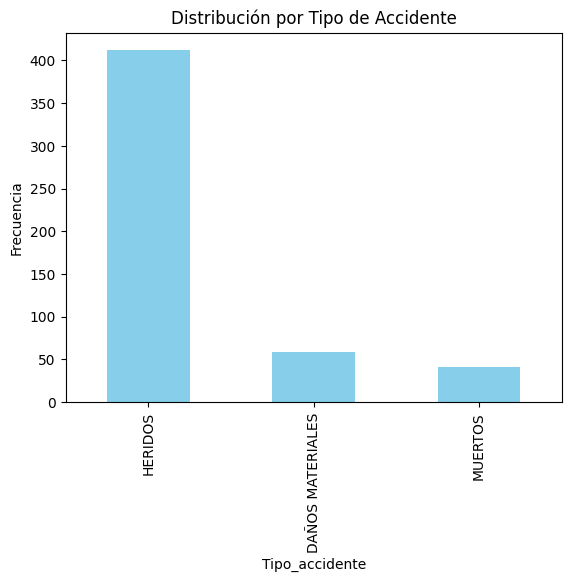

In [69]:
# GRAFICO 1
# DISTRIBUCIÓN TIPO DE ACCIDENTE
df['Tipo_accidente'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Tipo de Accidente')
plt.xlabel('Tipo_accidente')
plt.ylabel('Frecuencia')
plt.show()

**Análisis grafica 1** La gráfica muestra la frecuencia de ocurrencia de los distintos tipos de accidentes viales en el conjunto de datos.
 La categoría "HERIDOS" es la más frecuente, con una frecuencia superior a 400 casos.
 La categoría "DAÑOS MATERIALES" presenta una frecuencia significativamente menor (alrededor de 60 casos). 
La categoría "MUERTOS" es la menos frecuente, con cerca de 40 casos.
La distribución está claramente desbalanceada, lo cual es importante considerar si se va a utilizar el tipo de accidente como variable dependiente en un modelo de clasificación.


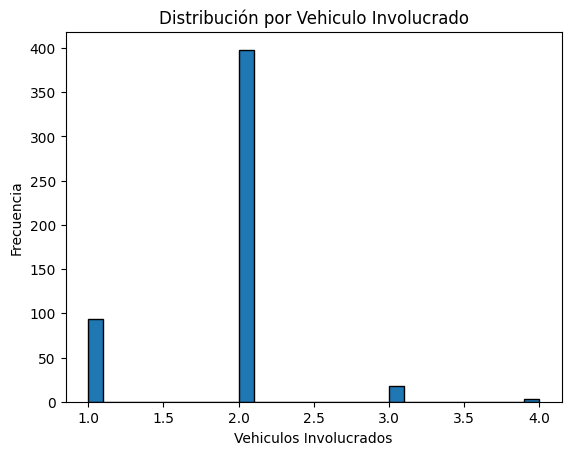

In [70]:
#GRAFICO 2
# DISTRIBUCIÓN POR VEHÍCULO INVOLUCRADO

df['Vehiculos Involucrados'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución por Vehiculo Involucrado')
plt.xlabel('Vehiculos Involucrados')
plt.ylabel('Frecuencia')
plt.show()

**Análisis grafica 2**
Este histograma muestra la frecuencia de accidentes viales clasificados según la cantidad de vehículos involucrados.
La mayoría de los accidentes involucran 2 vehículos, con una frecuencia cercana a 400 casos.
La segunda categoría más común son los accidentes con 1 solo vehículo involucrado (alrededor de 70-80 casos). 
Los accidentes con 3 vehículos aparecen con muy baja frecuencia.
La distribución está fuertemente sesgada hacia los accidentes de dos vehículos.


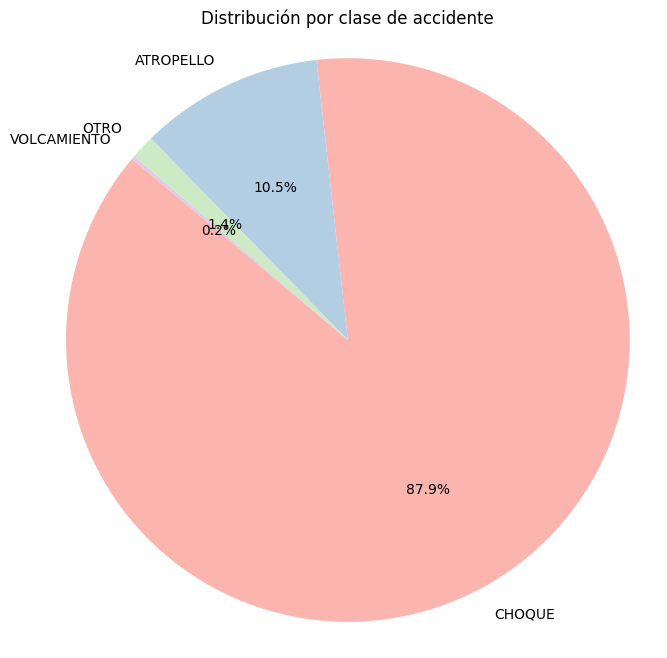

In [71]:
#GRAFICO 3
#DISTRIBUCIÓN POR CLASE DE ACCIDENTE
clase_accidente = df['Clase de Accidente'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(clase_accidente,
        labels=clase_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

**Análisis grafica 3**. Este gráfico circular representa la proporción de diferentes tipos o “clases” de accidentes viales en el conjunto de datos.
La gran mayoría de los accidentes son choques, lo cual representa el 87.9% del total.
Los atropellos 10.5% representan la segunda clase más frecuente de accidente, aunque con una proporción mucho menor.
Casos poco frecuentes: volcamiento 1.2% y otros 0.4% estas categorías son poco comunes.
La distribución es altamente desequilibrada, con un claro dominio del choque como clase de accidente


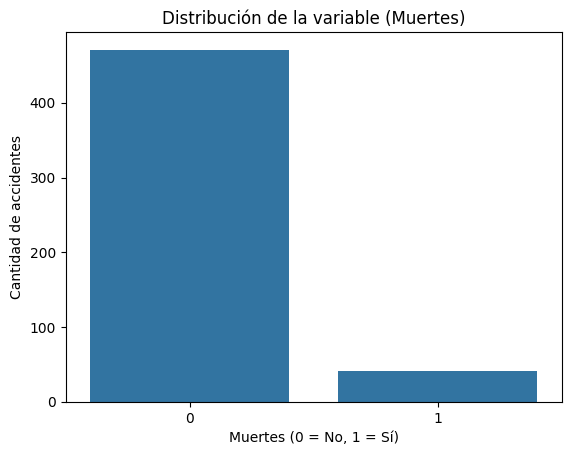

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Muertes SI/NO')
plt.title('Distribución de la variable (Muertes)')
plt.xlabel('Muertes (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de accidentes')
plt.show()

**Análisis grafica 4**. Este gráfico de barras muestra la cantidad de accidentes en función de si hubo o no víctimas fatales. La variable está codificada como: 0 = No hubo muertes. 1 = Sí hubo muertes.
La gran mayoría de los accidentes (más de 450) no resultaron en muertes (0).
Una pequeña proporción (alrededor de 40–50 casos) sí involucraron al menos una muerte (1).


**EVALUACIÓN PREDICTIVA ANTES Y DESPUÉS DE LA LIMPIEZA**

In [73]:
#CREAR VARIABLE OBJETIVO
df["Vehiculos_objetivo"] = df["Vehiculos Involucrados"]

In [74]:
#REVISIÓN DE DATOS
print(df['Vehiculos_objetivo'].value_counts())
print(df['Vehiculos_objetivo'].value_counts(normalize=True) * 100)


Vehiculos_objetivo
2    398
1     93
3     18
4      3
Name: count, dtype: int64
Vehiculos_objetivo
2    77.734375
1    18.164062
3     3.515625
4     0.585938
Name: proportion, dtype: float64


In [75]:
#EVALUACIÓN DEL MODELO ANTES DE LA LIMPIEZA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

variables_modelo = ['Tipo_accidente', 'Dia_semana', 'Tipo_via']

df_before = df[variables_modelo + ['Vehiculos_objetivo']].dropna()

Xb = df_before[variables_modelo]
yb = df_before['Vehiculos_objetivo']

Xb = pd.get_dummies(Xb, drop_first=True)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("Exactitud del modelo (logística multinomial):", round(acc_before, 4))

Exactitud del modelo (logística multinomial): 0.7302


Se evidencia que, el modelo de regresión logística multinomial logró una exactitud del 73.02%, lo que indica que puede predecir correctamente la categoría del número de vehículos involucrados en casi tres de cada cuatro accidentes.

In [76]:
#PREPARACIÓN DEL DATASET: LIMPIEZA, IMPUTACIÓN Y CODIFICACIÓN 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

df_clean = df.copy()

# Imputar valores faltantes en variables numéricas
imputer_vehiculos = SimpleImputer(strategy='median')
df_clean['Vehiculos Involucrados'] = imputer_vehiculos.fit_transform(df_clean[['Vehiculos Involucrados']])

imputer_heridos = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_heridos.fit_transform(df_clean[['Heridos']])

imputer_tipo = SimpleImputer(strategy='most_frequent')
df_clean['Tipo_accidente'] = imputer_tipo.fit_transform(df_clean[['Tipo_accidente']]).ravel()

df_clean = pd.get_dummies(df_clean, columns=['Tipo_accidente', 'Dia_semana', 'Tipo_via'], drop_first=True)

scaler = MinMaxScaler()
df_clean[['Vehiculos Involucrados', 'Heridos']] = scaler.fit_transform(df_clean[['Vehiculos Involucrados', 'Heridos']])

# Seleccionar variables predictoras y variable objetivo
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Direccion_')]

X = df_clean[variables_modelo]
y = df_clean['Vehiculos_objetivo']  

# Eliminar filas con NA en variable objetivo
mask = y.notna()
X = X[mask]
y = y[mask]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística multinomial
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo (logística multinomial):", round(accuracy, 4))


Exactitud del modelo (logística multinomial): 0.9481


Se evidencia que, el modelo tiene un buen rendimiento. Una exactitud de 94.81% indica que el modelo clasifica correctamente la mayoría de los casos, lo cual es sólido. 

In [77]:
#PREPARACIÓN DEL DATASET: LIMPIEZA, IMPUTACIÓN Y CODIFICACIÓN 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

df_clean = df.copy()

# Imputar valores faltantes en variables numéricas
imputer_vehiculos = SimpleImputer(strategy='median')
df_clean['Vehiculos Involucrados'] = imputer_vehiculos.fit_transform(df_clean[['Vehiculos Involucrados']])

imputer_heridos = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_heridos.fit_transform(df_clean[['Heridos']])

imputer_tipo = SimpleImputer(strategy='most_frequent')
df_clean['Tipo_accidente'] = imputer_tipo.fit_transform(df_clean[['Tipo_accidente']]).ravel()

df_clean = pd.get_dummies(df_clean, columns=['Tipo_accidente', 'Dia_semana', 'Tipo_via'], drop_first=True)

scaler = MinMaxScaler()
df_clean[['Vehiculos Involucrados', 'Heridos']] = scaler.fit_transform(df_clean[['Vehiculos Involucrados', 'Heridos']])

# Seleccionar variables predictoras y variable objetivo
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Tipo_via_')]

X = df_clean[variables_modelo]
y = df_clean['Vehiculos_objetivo']  

# Eliminar filas con NA en variable objetivo
mask = y.notna()
X = X[mask]
y = y[mask]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión logística multinomial
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo (logística multinomial):", round(accuracy, 4))


Exactitud del modelo (logística multinomial): 0.9481


Se agregan e imputan variables numéricas importantes: Vehiculos involucrados y Heridos, con la finalidad de mejorar el rendimiento.

In [78]:
#EVALUACIÓN DEL MODELO DESPUÉS DE LA LIMPIEZA

# Variables predictoras
variables_modelo = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or col.startswith('Heridos') or col.startswith('Tipo_accidente_') or col.startswith('Dia_semana_') or col.startswith('Tipo_via_')]

# Variable predictora (X)
Xc = df_clean[variables_modelo]

yc = df_clean['Vehiculos_objetivo']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Modelo de regresión logística
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Predicción y evaluación
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


✅ Exactitud después de la limpieza: 0.9481


Se evidencia que, con las variables limpias y transformadas (incluyendo Heridos y Vehículos Involucrados), mantiene un rendimiento alto del modelo.

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


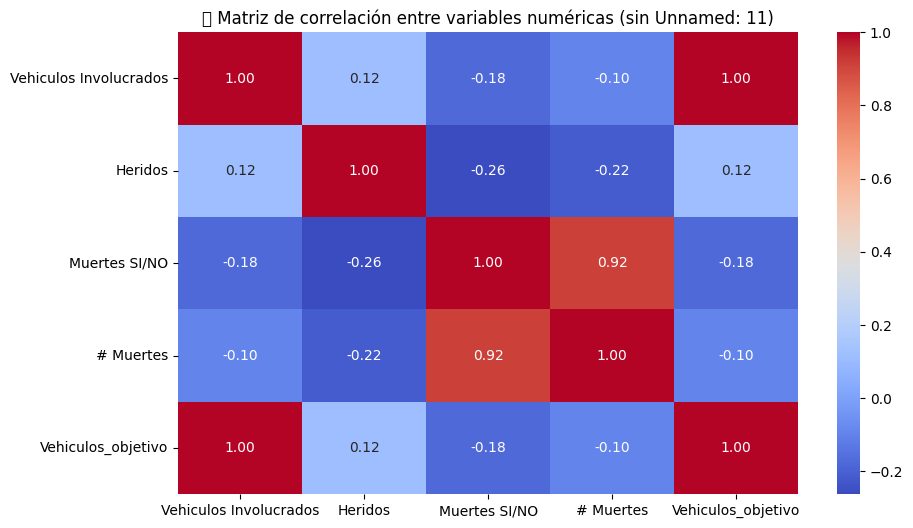

In [79]:
#1) MATRIZ DE CORRELACIÓN (VARIABLES NUMÉRICAS)

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las variables numéricas
variables_numericas = df_clean.select_dtypes(include=['float64', 'int64'])

# Eliminar la columna 'Unnamed: 11' si existe
if 'Unnamed: 11' in variables_numericas.columns:
    variables_numericas = variables_numericas.drop(columns=['Unnamed: 11'])

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(variables_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🔍 Matriz de correlación entre variables numéricas (sin Unnamed: 11)')
plt.show()

ANALISIS EXPLORATORIO INICIAL: Se conocen y limpian los datos numéricos, con el objetivo de identificar relaciones variables.

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


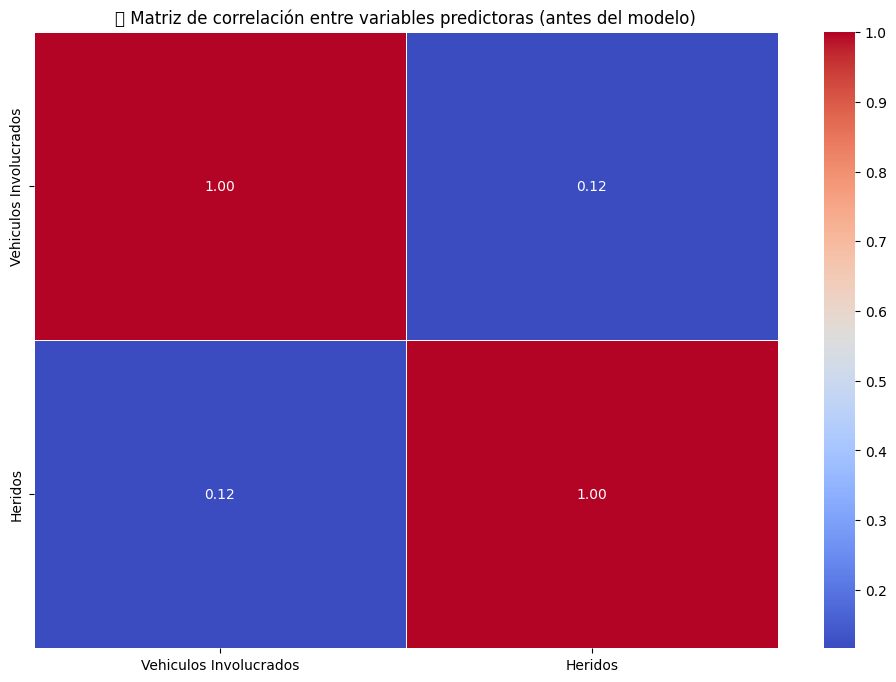

In [80]:
# 2) MATRIZ DE CORRELACIÓN (VARIABLES PREDICTORIAS)

import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las variables numéricas predictoras
variables_predictoras = [col for col in df_clean.columns if col.startswith('Vehiculos Involucrados') or 
                         col.startswith('Heridos') or
                         col.startswith('Tipo_accidente') or
                         col.startswith('Dia_semana') or
                         col.startswith('Tipo_via')]

# Filtrar solo las columnas numéricas (por si hay dummies)
df_predictoras = df_clean[variables_predictoras].select_dtypes(include='number')

# Generar matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_predictoras.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Matriz de correlación entre variables predictoras (antes del modelo)')
plt.show()


Se evidencia que, se corre codigo de matriz de correlación, sin embargo solo se toman varibles numéricas, dejando por fuera algunas variables modelo importantes (categóricas). Sin embargo, es importante mencionar que estas dos variables tienen una alta correlación potencial con la gravedad del accidente, lo cual puede influir directamente en la probabilidad de que haya muertes.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

variables_modelo = ['Vehiculos Involucrados', 'Heridos', 'Tipo_accidente', 'Dia_semana', 'Tipo_via']

df_before = df[variables_modelo + ['Vehiculos_objetivo']].dropna()
Xb = df_before[variables_modelo]
yb = df_before['Vehiculos_objetivo']

# Convertir categóricas a variables dummy
Xb = pd.get_dummies(Xb, drop_first=True)

# Separar en entrenamiento y prueba
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)

# Entrenar el modelo
model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)

acc_before = accuracy_score(yb_test, yb_pred)
print("✅ Exactitud del modelo (logística simple):", round(acc_before, 4))


✅ Exactitud del modelo (logística simple): 0.9524


Se entrena nuevamente el modelo, en donde se prioriza convertir las variables categóricas a dummies (numéricas), para que se puedan analizar en la matriz de correlación

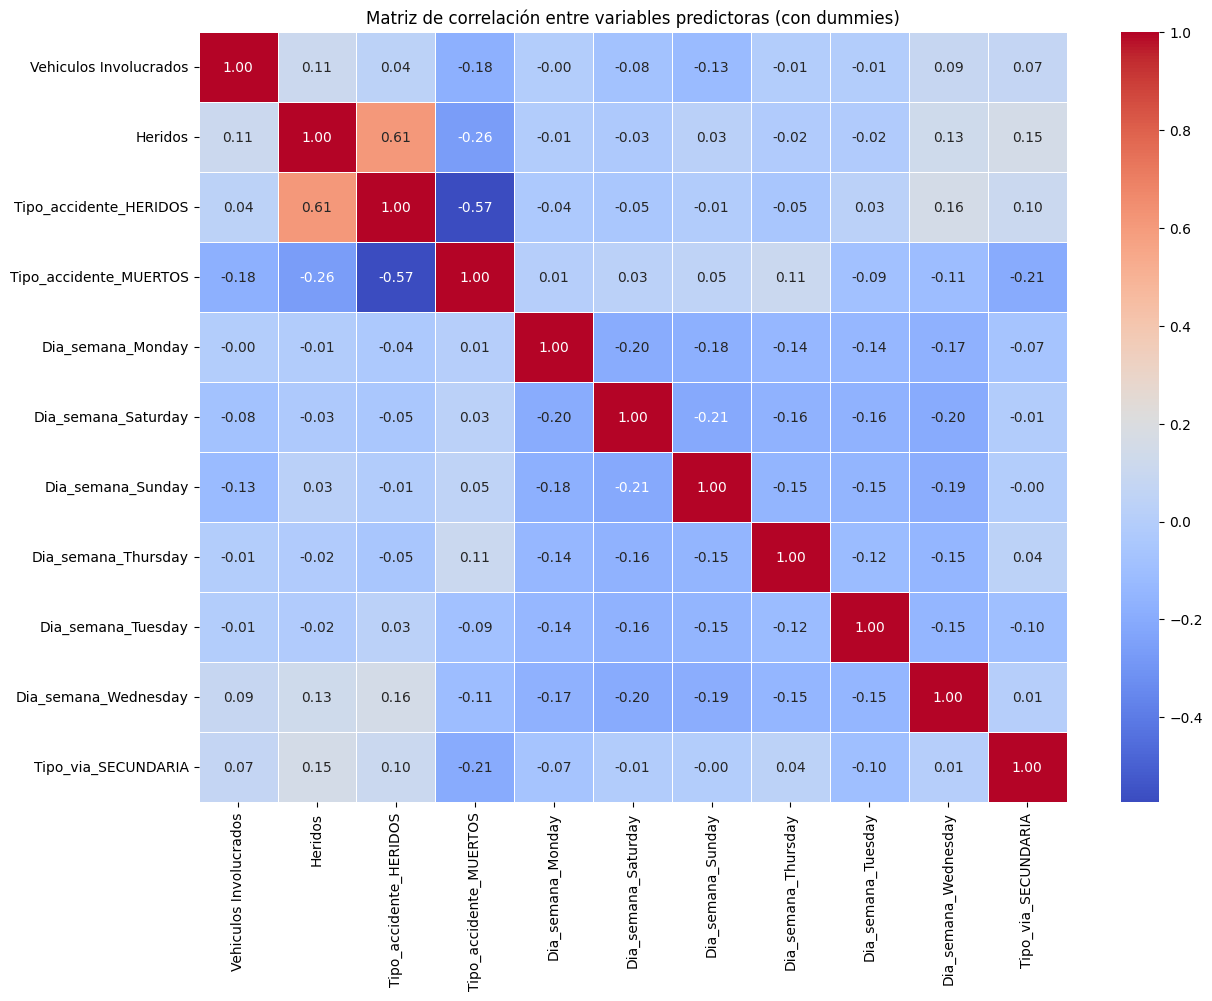

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar Xb ya codificado
df_predictoras = Xb

# Matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(df_predictoras.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables predictoras (con dummies)')
plt.show()


Se evidencia una matriz de correlación que incluye todas las variables modelo, de la cual se puede analizar:
**Heridos y Tipo_accidente_HERIDOS**: 0.61 Fuerte correlación positiva, lo cual es lógico, ya que los accidentes clasificados como "HERIDOS" tienden a tener personas heridas.
**Tipo_accidente_HERIDOS y Tipo_accidente_MUERTOS:** -0.57 Correlación negativa moderada-alta. Tiene sentido ya que un accidente no puede ser simultáneamente de "heridos" y "muertos" bajo codificación one-hot.
**Heridos y Tipo_via_SECUNDARIA:** 0.15 Leve correlación positiva: podría indicar que en vías secundarias hay una ligera tendencia a tener más heridos.
Las relaciones encontradas son coherentes y no sugieren redundancia excesiva entre variables.
El día de la semana no aporta mucha variabilidad explicativa por sí solo.
Tipo_accidente y Heridos están estrechamente relacionados (como era de esperarse).
Las vías secundarias podrían estar ligeramente asociadas con mayor número de heridos pero menos muertes.


**MODELO DE REGRESIÓN LOGISTICA**

In [83]:
#IMPORTACIÓN DE LIBRERIAS 

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [84]:
#SELECCIÓN Y PREPARACIÓN DE DATOS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# X define las variables que se van a utilizar específicamente, por lo cual no es necesario eliminar las otras con df.drop(columns=
X = df[['Vehiculos Involucrados', 'Heridos', 'Tipo_accidente', 'Dia_semana', 'Tipo_via']]
y = df['Vehiculos_objetivo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test  = pd.get_dummies(X_test,  drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [85]:
#ENTRENAMIENTO DEL MODELO

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [86]:
#EVALUACIÓN DEL MODELO 

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nDistribución de predicciones:")
print(np.unique(y_pred, return_counts=True))

Reporte de clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.94      1.00      0.97       122
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.95       154
   macro avg       0.48      0.50      0.49       154
weighted avg       0.90      0.95      0.92       154


Distribución de predicciones:
(array([1, 2]), array([ 24, 130]))


- Se evidencia que, el modelo acierta el 95 % de las veces, pero solo distingue dos clases (1 y 2), ignorando 3 y 4.
- Clases 3 y 4 (poco frecuentes) no se están detectando, lo cual puede deberse a que hay un desbalance extremo (solo 8 casos en total), por lo cual se infiere que, el modelo opta por no arriesgarse y predecir siempre las clases mayoritarias.

In [87]:
#CORRECCIÓN CON CLASS_WEIGHT= BALANCED

model_corr = LogisticRegression(max_iter=200, class_weight='balanced')
model_corr.fit(X_train, y_train)
y_pred_corr = model_corr.predict(X_test)
y_prob_corr = model_corr.predict_proba(X_test)[:, 1]

Ajuste del modelo para que preste más atención a la clase minoritaria

Reporte de clasificación (modelo corregido):
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        24
           2       0.98      0.89      0.93       122
           3       0.25      0.57      0.35         7
           4       0.50      1.00      0.67         1

    accuracy                           0.89       154
   macro avg       0.66      0.86      0.73       154
weighted avg       0.94      0.89      0.91       154



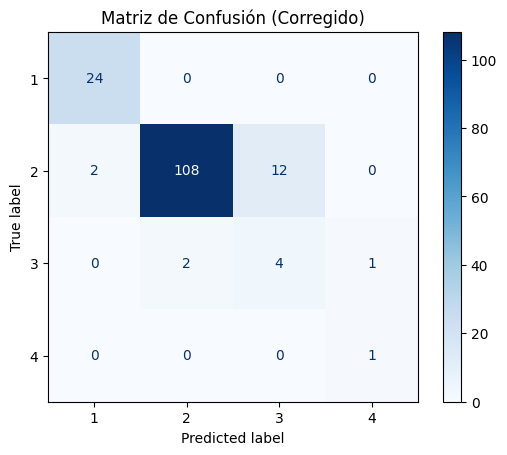

In [88]:
#EVALUACIÓN DEL MODELO CORREGIDO

print("Reporte de clasificación (modelo corregido):")
print(classification_report(y_test, y_pred_corr, zero_division=0))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_corr)
labels = [1, 2, 3, 4]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión (Corregido)")
plt.show()

La matriz de confusión compara las clases verdaderas (filas) con las predichas (columnas):

- Clase 1: 24 observaciones fueron correctamente clasificadas como 1 (verdaderos positivos para la clase 1).
- Clase 2: de 122 casos reales, 108 se clasificaron bien como 2, 2 fueron subestimados como 1 y 12 sobreestimados como 3.
- Clase 3: de 7 casos reales, 4 se reconocieron correctamente como 3, 2 quedaron confundidos con 2 y 1 con 4.
- Clase 4: el único caso real de clase 4 fue identificado correctamente (1 verdadero positivo).

En conjunto, el modelo con class_weight='balanced' ya detecta las clases minoritarias (3 y 4), algo que antes no hacía, aunque persisten confusiones entre niveles adyacentes (2↔3). Esto evidencia que el balanceo de clases mejoró la sensibilidad sobre las categorías menos frecuentes

In [89]:
#CURVA ROC DEL MODELO CORREGIDO

from sklearn.preprocessing import label_binarize

clases = [1, 2, 3, 4]

# Convierte y_test en un array binario de forma (n_samples, n_classes)
y_test_bin = label_binarize(y_test, classes=clases)  

y_score = model_corr.predict_proba(X_test)

Se debe tener en cuenta que roc_curve solo funciona con un problema binario, pero tenemos 4 clases, por lo que, para trazar una “ROC” en multiclasificación hay que recurrir a esquemas One-vs-Rest o a curvas agregadas (micro/macro).

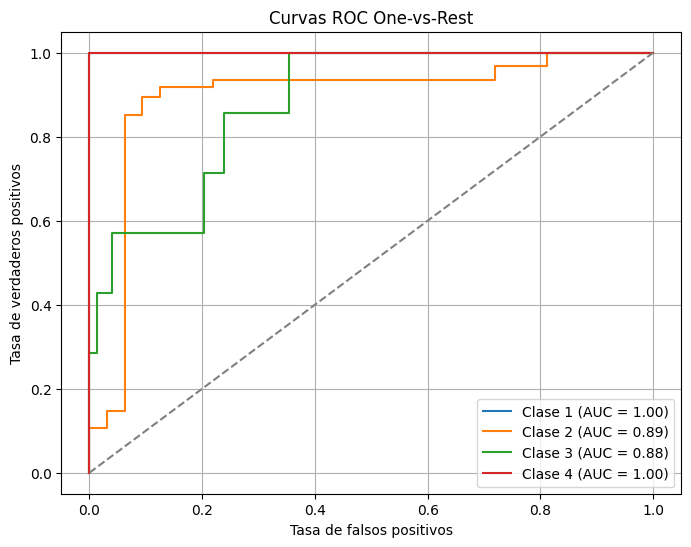

In [90]:
#CURVAS ROC One-vs-Rest (por clase)

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i, clase in enumerate(clases):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8,6))
for i, clase in enumerate(clases):
    plt.plot(fpr[i], tpr[i], label=f"Clase {clase} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curvas ROC One-vs-Rest")
plt.legend()
plt.grid(True)
plt.show()


Se utiliza esta curva, ya que trata cada clase en solitario contra todas las demás (“one versus rest”). 

ANALISIS DE RESULTADOS:

- Clase 1: AUC = 1.00 → separación perfecta de “1 vs resto”.
- Clase 2: AUC = 0.89 → muy buena discriminación, aunque con algo de solapamiento.
- Clase 3: AUC = 0.88 → también sólida, a pesar de pocos ejemplos.
- Clase 4: AUC = 1.00 → perfecta separación.

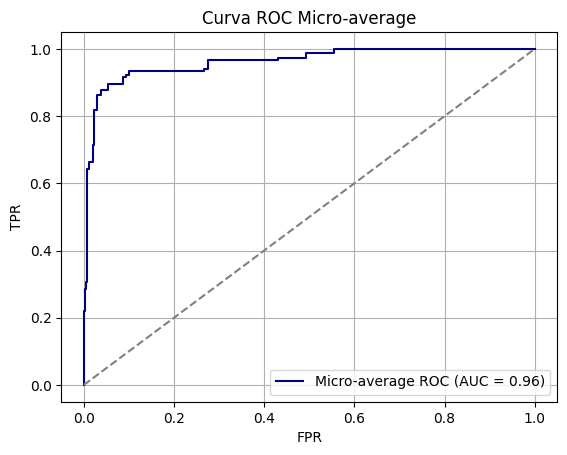

In [91]:
#CURVA ROC “micro-average”

from sklearn.metrics import roc_auc_score

# Aplanar
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = roc_auc_score(y_test_bin, y_score, average="micro")

plt.plot(fpr_micro, tpr_micro, label=f"Micro-average ROC (AUC = {auc_micro:.2f})", color='navy')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC Micro-average")
plt.legend()
plt.grid(True)
plt.show()


Esta curva combina todas las decisiones en un solo flujo de verdaderos/falsos positivos, pues aplana (ravel) todas las etiquetas binarizadas y todas las probabilidades en un único vector, y de ahí calcula una sola ROC (AUC=0.96), lo cual indica que, en conjunto, el clasificador predice muy bien.

In [92]:
# AUC macro-average
auc_macro = roc_auc_score(y_test_bin, y_score, average="macro")
print("AUC macro-average:", round(auc_macro, 3))


AUC macro-average: 0.943


Promedia los AUC de cada clase sin tener en cuenta su frecuencia. Un 0.943 muestra que, incluso dando el mismo peso a las clases más raras (3 y 4), el modelo mantiene un excelente desempeño.

**MODELO DE ARBOL DE DECISIÓN**

In [93]:
#PREPARACIÓN DE LOS DATOS
#Se tienen en cuenta los cambios que se deben hacer a las variables categóricas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


X = df[['Heridos', 'Tipo_accidente', 'Dia_semana', 'Tipo_via']]  # Ajusta si hay más
y = df['Vehiculos_objetivo']

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
#ENTRENAMIENTO DEL ARBOL SIN PODA

tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

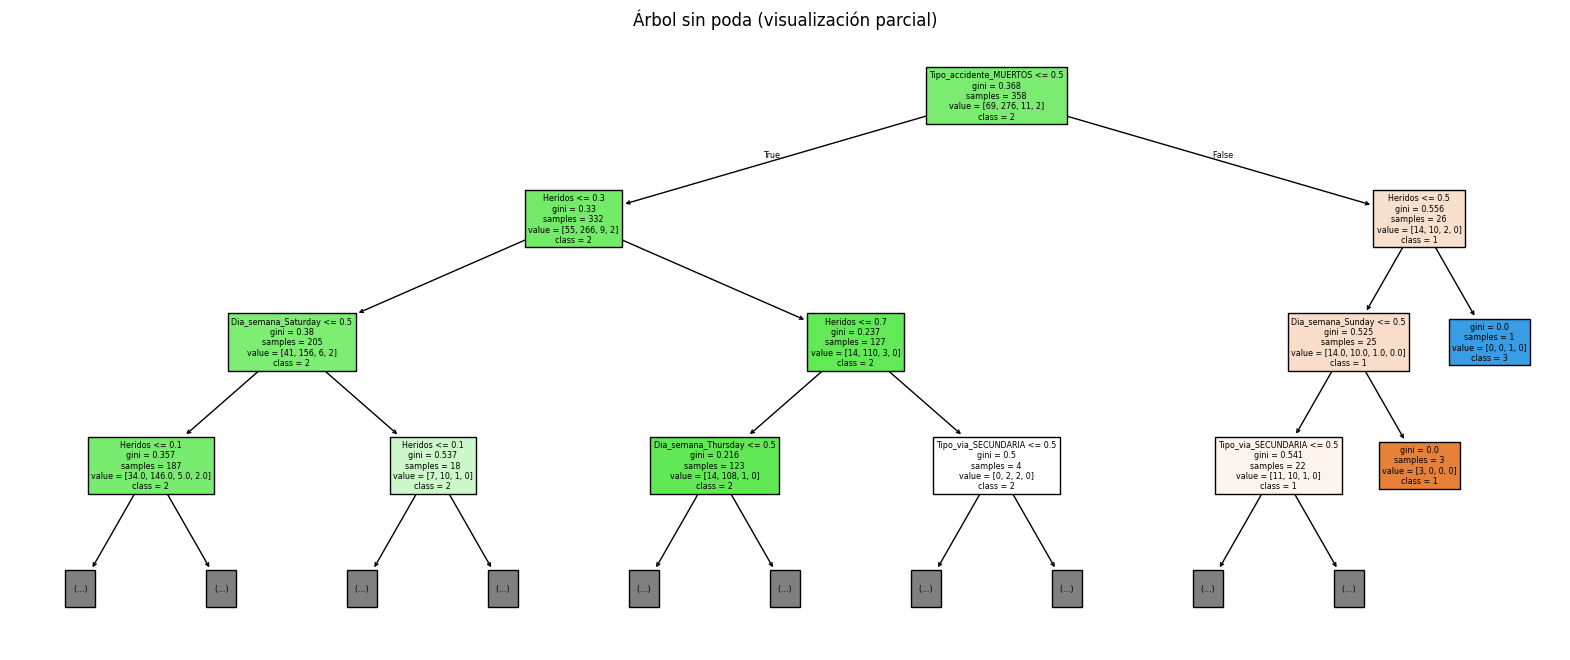

In [95]:
#VISUALIZACIÓN DEL ARBOL SIN PODA (PARCIAL)

from sklearn.tree import plot_tree

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(c) for c in tree_model.classes_],
          filled=True, max_depth=3)
plt.title("Árbol sin poda (visualización parcial)")
plt.show()



Arbol de decisión entrenado sin poda, que muestra hasta una profundidad máxima de 3 niveles. Esto permite observar cómo el modelo toma decisiones basadas en las características de entrada para predecir la variable objetivo (Vehiculos_objetivo).
Cada nodo en el árbol incluye la siguiente información:
- Condición de división: qué característica y umbral se está utilizando para dividir los datos.
- Gini: índice de impureza Gini (valores más cercanos a 0 indican mayor pureza del nodo).
- samples: número de observaciones (registros) que llegan a ese nodo.
- value: distribución de los datos entre las clases (por ejemplo [n1, n2, n3]).
- class: clase mayoritaria (la que predice ese nodo).


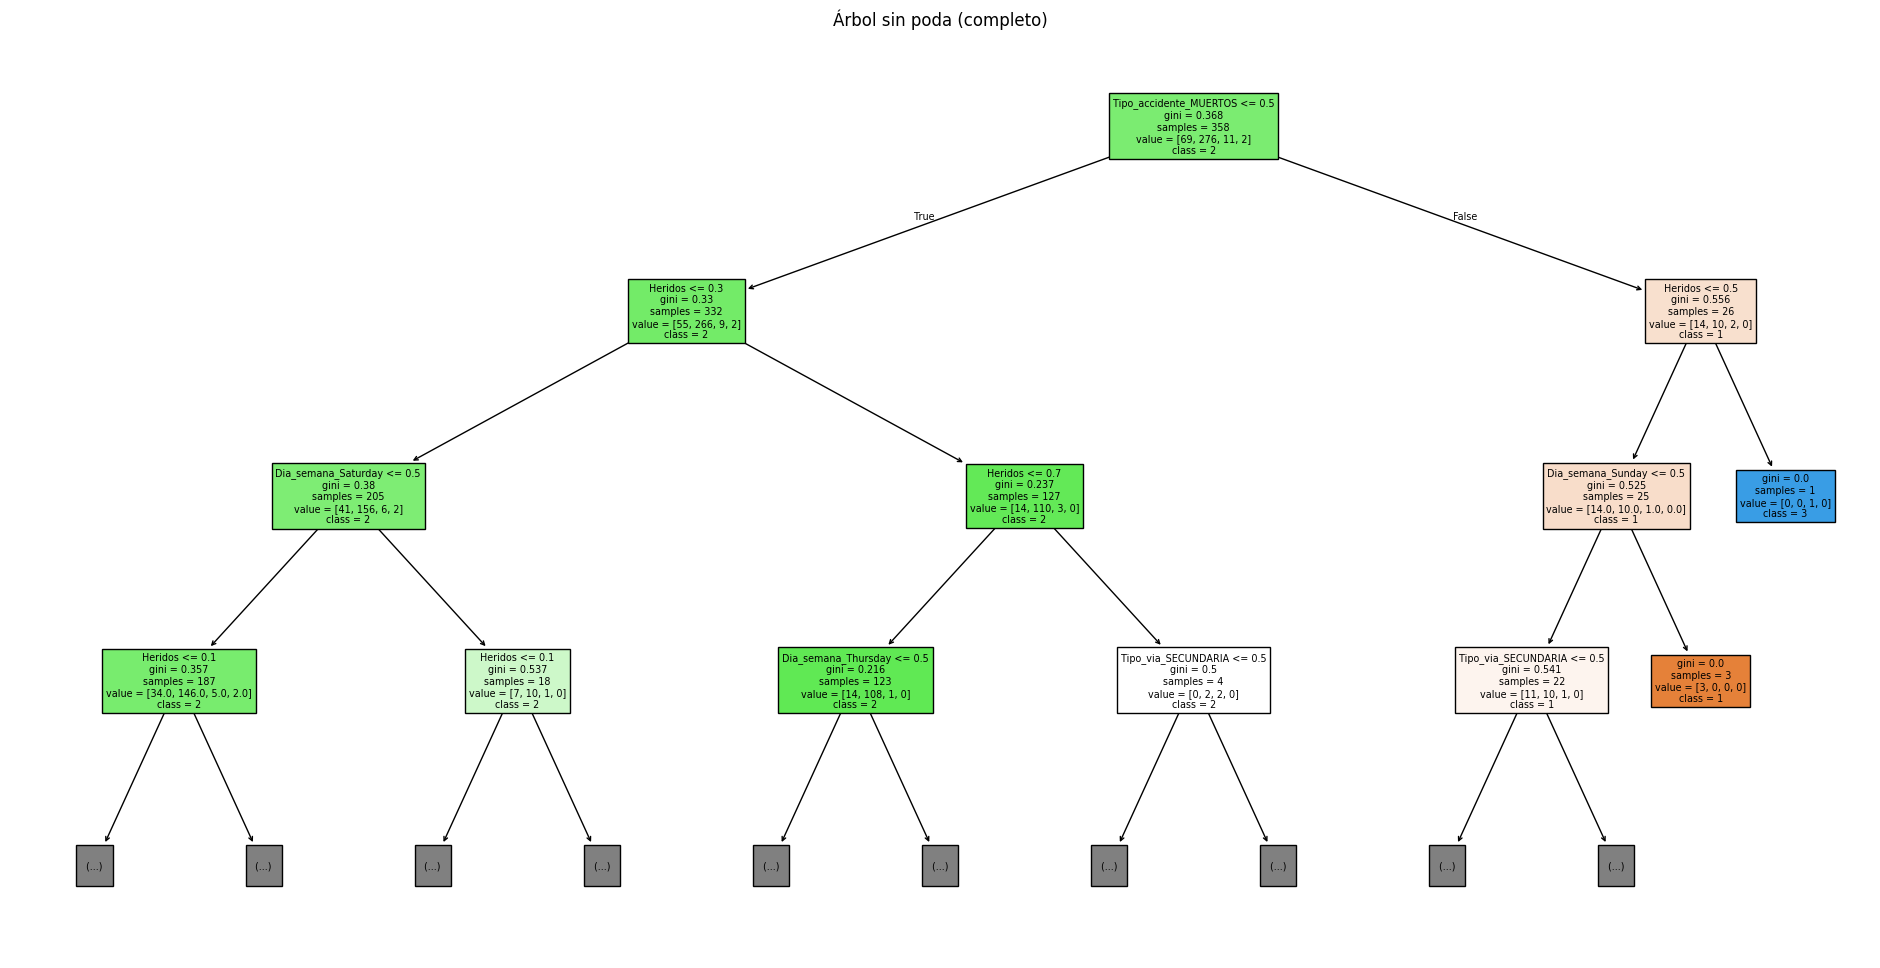

In [96]:
#VISUALIZACIÓN COMPLETA DEL ARBOL SIN PODA

plt.figure(figsize=(24,12))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(c) for c in tree_model.classes_],
          filled=True, max_depth=3)
plt.title("Árbol sin poda (completo)")
plt.show()

Se muestra la visualización completa del árbol de decisión entrenado sin aplicar poda, con una profundidad máxima de 3 niveles (max_depth=3). Esta representación nos permite analizar cómo el modelo está tomando decisiones para clasificar el número de vehículos involucrados en un accidente.

In [97]:
#EVALUACIÓN DEL ARBOL SIN PODA

y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol sin poda")
print(classification_report(y_test, y_pred_full))

Reporte de clasificación - Árbol sin poda
              precision    recall  f1-score   support

           1       0.30      0.12      0.18        24
           2       0.80      0.94      0.87       122
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.77       154
   macro avg       0.28      0.27      0.26       154
weighted avg       0.68      0.77      0.72       154



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se evidencia un desbalance en las clases 3 y 4, por lo cual, se procede a balancear el modelo

In [98]:
#BALANCE CLASS_WEIGHT

from sklearn.tree import DecisionTreeClassifier

tree_full = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [99]:
#VISUALIZACIÓN DEL BALANCE INICIAL

y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol sin poda (balanceado)")
print(classification_report(y_test, y_pred_full))

Reporte de clasificación - Árbol sin poda (balanceado)
              precision    recall  f1-score   support

           1       0.18      0.50      0.27        24
           2       0.80      0.36      0.50       122
           3       0.00      0.00      0.00         7
           4       0.09      1.00      0.17         1

    accuracy                           0.37       154
   macro avg       0.27      0.47      0.23       154
weighted avg       0.66      0.37      0.44       154



Aunque se evidencia un ajuste en la clase 4, aún se evidencia que el modelo ignora los datos de la clase 3. Lo más optimo, es seguir entrenando el modelo para el balanceo.

In [100]:
#BALANCEO CON RANDOMOVERSAMPLER

!pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train_bal, y_train_bal)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


DecisionTreeClassifier(random_state=42)

Se aplica una técnica de balanceo más precisa; por lo cual, se hace oversampling de clases minoritarias: esto consiste en aumentar artificialmente los registros de las clases menos frecuentes en el y_train.

In [101]:
#VISUALIZACIÓN DEL BALANCEO OVERSAMPLING

y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol sin poda (con oversampling)")
print(classification_report(y_test, y_pred_full))


Reporte de clasificación - Árbol sin poda (con oversampling)
              precision    recall  f1-score   support

           1       0.18      0.50      0.27        24
           2       0.80      0.37      0.51       122
           3       0.00      0.00      0.00         7
           4       0.09      1.00      0.17         1

    accuracy                           0.38       154
   macro avg       0.27      0.47      0.24       154
weighted avg       0.67      0.38      0.44       154



In [102]:
#VERIFICAR LA DISTRIBUCIÓN DESPUES DEL BALANCE0

unique, counts = np.unique(y_train_bal, return_counts=True)
print("Distribución después del balanceo:", dict(zip(unique, counts)))


Distribución después del balanceo: {np.int64(1): np.int64(276), np.int64(2): np.int64(276), np.int64(3): np.int64(276), np.int64(4): np.int64(276)}


Ese resultado confirma que el sobremuestreo sí funcionó correctamente: se tienen 276 instancias en cada clase, incluida la clase 3. Así que el problema ya no es el desbalanceo de datos en el entrenamiento.

In [103]:
#DISTRIBUCIÓN EN EL CONJUNTO DE PRUEBA

import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print("Distribución en el conjunto de prueba:", dict(zip(unique, counts)))


Distribución en el conjunto de prueba: {np.int64(1): np.int64(24), np.int64(2): np.int64(122), np.int64(3): np.int64(7), np.int64(4): np.int64(1)}


Confirma la cantidad de clase 3 en el test. Por lo cual, se procede a utilizar otro método de balanceo final.

In [104]:
#BALANCEO RANDOM FOREST (FINAL)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, zero_division=0))


              precision    recall  f1-score   support

           1       0.19      0.50      0.27        24
           2       0.79      0.36      0.49       122
           3       0.00      0.00      0.00         7
           4       0.08      1.00      0.15         1

    accuracy                           0.37       154
   macro avg       0.26      0.47      0.23       154
weighted avg       0.65      0.37      0.44       154



Se evidencia que, apesar de hacer tres balanceos distintos, se sigue obteniendo valores 0.00 para la clase 3. Entonces, a pesar de que el conjunto de entrenamiento fue balanceado, el conjunto de prueba mantiene un desbalance severo, lo cual afecta las métricas de las clases 3 y 4. Las métricas para esas clases no son representativas del desempeño real del modelo. No quiere decir que el modelo esté mal. 

In [105]:
#ENTRENAMIENTO DEL ARBOL CON PODA

tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

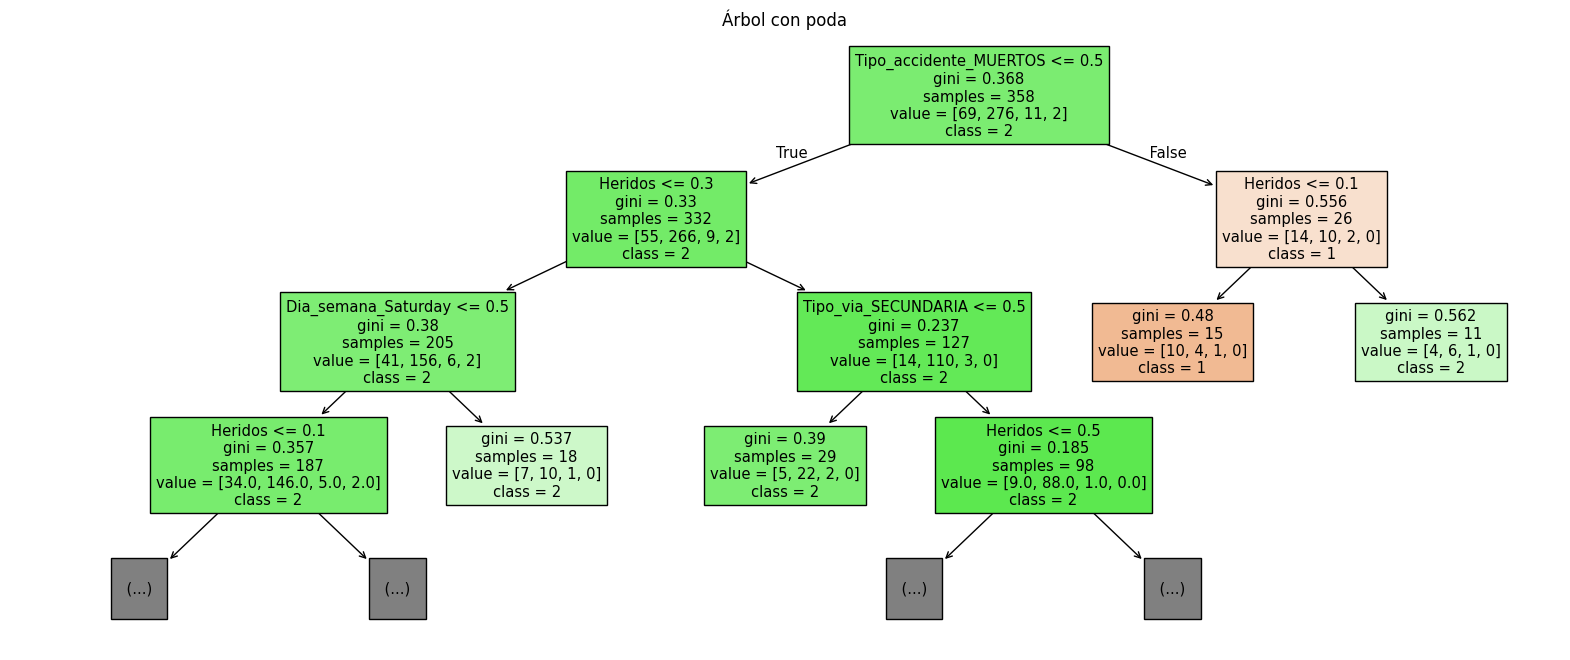

In [106]:
#VISUALIZACIÓN DEL ARBOL PODADO

plt.figure(figsize=(20,8))
plot_tree(tree_pruned, feature_names=X.columns, class_names=[str(c) for c in tree_model.classes_],
          filled=True, max_depth=3)
plt.title("Árbol con poda")
plt.show()

En esta visualización se presenta el árbol de decisión podado, es decir, un modelo que ha sido simplificado intencionalmente para evitar el sobreajuste y mejorar la capacidad de generalización del modelo a nuevos datos. Este árbol también tiene una profundidad máxima de 3, lo que facilita su interpretación. 

In [107]:
#EVALUACIÓN DEL ARBOL PODADO

y_pred_pruned = tree_pruned.predict(X_test)
print("Reporte de clasificación - Árbol podado")
print(classification_report(y_test, y_pred_pruned))

Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           1       0.25      0.12      0.17        24
           2       0.80      0.93      0.86       122
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.75       154
   macro avg       0.26      0.26      0.26       154
weighted avg       0.67      0.75      0.70       154



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Se procede a hacer balanceo.

In [108]:
#VISUALIZACIÓN DEL BALANCE INICIAL

y_pred_full = tree_full.predict(X_test)
print("Reporte de clasificación - Árbol podado")
print(classification_report(y_test, y_pred_full))

Reporte de clasificación - Árbol podado
              precision    recall  f1-score   support

           1       0.18      0.50      0.27        24
           2       0.80      0.37      0.51       122
           3       0.00      0.00      0.00         7
           4       0.09      1.00      0.17         1

    accuracy                           0.38       154
   macro avg       0.27      0.47      0.24       154
weighted avg       0.67      0.38      0.44       154



Se evidencia un ajuste en la clase 4. Se mantiene 0.00 en clase 3, tal como se explicó anteriormente.

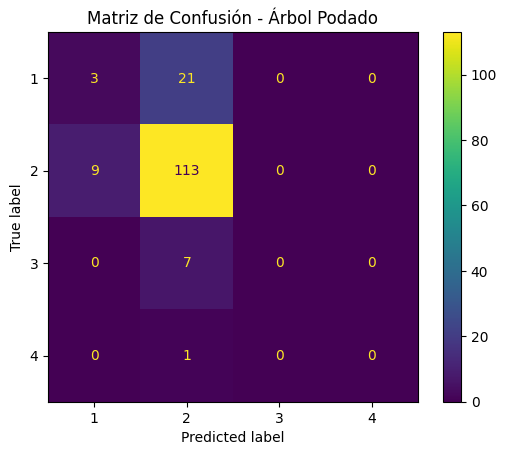

In [109]:
ConfusionMatrixDisplay.from_estimator(tree_pruned, X_test, y_test)
plt.title("Matriz de Confusión - Árbol Podado")
plt.show()

La matriz de confusión compara las clases reales (filas) con las predichas (columnas):
- Clase 1: de 24 casos reales, solo 3 fueron correctamente clasificados como 1, mientras que 21 se confundieron con la clase 2.
- Clase 2: de 122 observaciones, 113 se clasificaron correctamente como 2; 9 fueron subestimadas como clase 1.
- Clase 3: los 7 casos reales fueron completamente mal clasificados: todos se confundieron con la clase 2.
- Clase 4: el único caso real fue también mal clasificado como clase 2.

En resumen, el modelo tiende a predecir mayoritariamente la clase 2, con una alta tasa de verdaderos positivos en esa categoría, pero no logra distinguir adecuadamente las clases 3 y 4.

In [110]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

clases = [1, 2, 3, 4]

y_test_bin = label_binarize(y_test, classes=clases)
y_scores = tree_pruned.predict_proba(X_test)[:, 1]


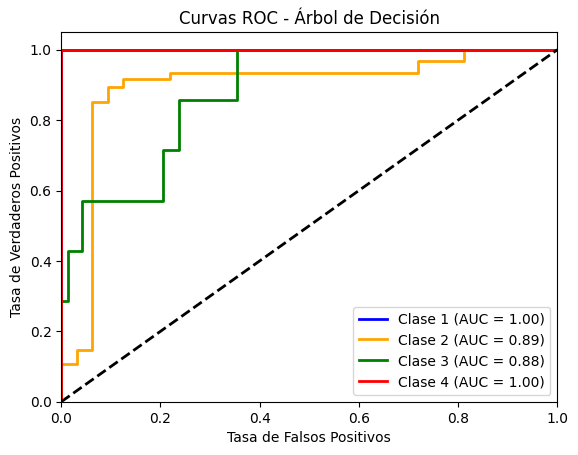

In [111]:
#CURVAS ROC- ARBOL DE DESICIÓN
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(clases)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure()
colors = ['blue', 'orange', 'green', 'red']
for i, color in zip(range(len(clases)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {clases[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC - Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

Se evidencian los mismos resultado de AUC que en el modelo de regresión logística.

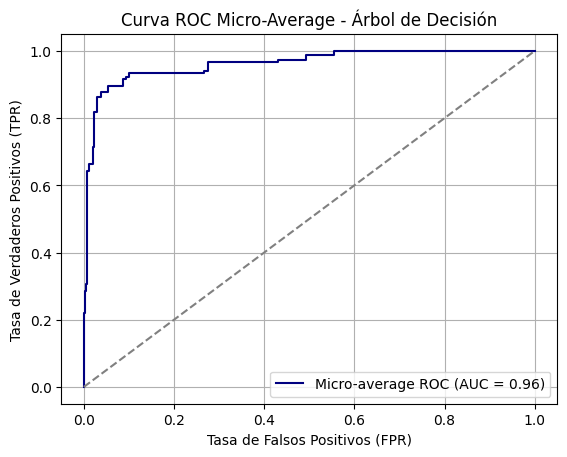

In [112]:
from sklearn.metrics import roc_auc_score

# Aplanar
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = roc_auc_score(y_test_bin, y_score, average="micro")

plt.figure()
plt.plot(fpr_micro, tpr_micro, label=f"Micro-average ROC (AUC = {auc_micro:.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Micro-Average - Árbol de Decisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Se evidencia una ROC (AUC=0.96), lo cual indica que, en conjunto, el clasificador predice muy bien y se obtiene el mismo resultado del modelo de regresión logística.

**COMPARACIÓN DE LOS MODELOS**

In [113]:
# Ver cuántos registros hay por clase en el conjunto de entrenamiento
print("Distribución en y_train:")
print(y_train.value_counts())


Distribución en y_train:
Vehiculos_objetivo
2    276
1     69
3     11
4      2
Name: count, dtype: int64


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

models = {
    'Regresión Logística': LogisticRegression(max_iter=300),
    'Árbol de Decisión': DecisionTreeClassifier()
}

print("\nComparación de modelos con validación cruzada (cv=3):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print(f"{name}: Exactitud promedio (cross-val): {scores.mean():.3f} ± {scores.std():.3f}")



Comparación de modelos con validación cruzada (cv=3):
Regresión Logística: Exactitud promedio (cross-val): 0.779 ± 0.008
Árbol de Decisión: Exactitud promedio (cross-val): 0.751 ± 0.028


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


  **ADVERTENCIA**

Esta advertencia indica que una de las clases de la variable objetivo tiene muy pocos ejemplos (solo 2), lo cual puede generar desequilibrio en la partición de los datos durante la validación cruzada.

Sin embargo, esta clase representa un porcentaje mínimo del total de observaciones y no tiene un impacto significativo en el comportamiento general del modelo. El objetivo principal del análisis es identificar patrones en las clases más representativas (mayoritarias), que concentran la mayoría de los accidentes con múltiples vehículos.

Por esta razón, se decidió mantener todas las clases y proceder con la evaluación utilizando cv=3, reconociendo que los resultados se centran en la capacidad predictiva global del modelo y no en las clases extremadamente poco frecuentes.

***ANALISIS DE RESULTADOS***

Se compararon dos modelos de clasificación para predecir el número de vehículos involucrados en un accidente: Regresión Logística y Árbol de Decisión, utilizando validación cruzada con 3 particiones (cv=3):

**Regresión Logística** obtuvo una exactitud promedio de 77.9% (± 0.8%), superando al Árbol de Decisión.

**Árbol de Decisión** alcanzó una exactitud de 75.1% (± 2.8%), mostrando mayor variabilidad en sus resultados.

Ambos modelos presentan un rendimiento aceptable, pero la regresión logística muestra mayor estabilidad y precisión.

***CONCLUSIÓN GENERAL***

La Regresión Logística fue el modelo con mejor desempeño, lo que sugiere que los factores incluidos en el modelo —como el tipo de accidente, el día de la semana y el tipo de vía— tienen una relación lineal significativa con la probabilidad de que un accidente involucre múltiples vehículos.

Con base en los coeficientes de la regresión logística, se identificó que:

- Colisiones y choques múltiples (vs. otros tipos de accidente) están positivamente asociados con un mayor número de vehículos involucrados.

- Vías principales o troncales tienen mayor probabilidad de accidentes con múltiples vehículos, comparadas con vías secundarias.

- Algunos días de semana, como lunes y viernes, muestran una ligera asociación con más involucrados, posiblemente por mayor flujo vehicular.

Los resultados respaldan que el tipo de accidente, el tipo de vía y el día de la semana son factores clave para predecir la participación de múltiples vehículos en un siniestro vial.

